<h1 style="font-size:28px; font-family: sans-serif; font-bold; color:#2c3e50;">Lab 2 – Single Qubit Gates</h1>

<p style="font-size:16px; font-family: sans-serif;">
<strong>Level:</strong> Beginner &nbsp; | &nbsp;
<strong>Estimated Duration:</strong> 1.5 hours &nbsp; | &nbsp;
<strong>Category:</strong> Quantum Fundamentals
</p>

<hr>

<div style="background: #f4f4f6; border-radius: 8px; padding: 20px; font-family: sans-serif; font-size: 16px; line-height: 1.6;">
  <h2 style="margin-top: 0; background: #2c3e50; color: white; padding: 10px 15px; border-radius: 5px 5px 0 0;">
    Table of Contents
  </h2>
  <ol style="padding-left: 20px; margin: 0;">
    <li><b>Objectives</b></li>
    <li><b>Key Concepts</b></li>
    <li><b>Theoretical Background</b></li>
      <ul> 
      <li>3.1 Introduction to Quantum Gates</li>
      <li>3.2 Fundamental Quantum Gates</li>
      </ul>
    <li><b>Environment Setup</b></li>
    <li><b>Implementation</b></li>
      <ul>
          <li>5.1 Pauli Gates</li>
          <li>5.2 Hadamard Gate</li>
          <li>5.3 Phase and Rotation Gates</li>
          <li>5.4 The U Gate: General Single-Qubit Operation</li>
      </ul>
    <li><b>Exercises</b></li>
    <li><b>Reflection</b></li>
    <li><b>Conclusion</b></li>
    <li><b>References</b></li>
  </ol>
</div>

<div style="background: #E8E7EB; border-radius: 5px; font-family: sans-serif;">
  <p style="background: #2c3e50; color:white; padding: 10px 15px; font-size:18px; border-radius: 5px 5px 0 0; margin:0;">
    <b>1. Objectives</b>
  </p>
  <ul style="padding: 10px 20px; font-size:16px; margin:0;">
    <li><strong>Understand</strong> the concept and mathematical representation of <em>single-qubit quantum gates</em>.</li>
    <li><strong>Explore</strong> how these gates act as <em>rotations</em> and <em>phase shifts</em> on the Bloch sphere.</li>
    <li><strong>Implement</strong> and visualize fundamental gates such as <em>Pauli-X, Y, Z, Hadamard, S</em>, and <em>T</em> using <em>Qiskit</em>.</li>
    <li><strong>Analyze</strong> how each operation transforms different <em>quantum states</em>.</li>
  </ul>
</div>

<div style="background: #E8E7EB; border-radius: 5px; font-family: sans-serif;">
  <p style="background: #2c3e50; color:white; padding: 10px 15px; font-size:18px; border-radius: 5px 5px 0 0; margin:0;">
    <b>2. Key Concepts</b>
  </p>
  <ul style="padding: 10px 20px; font-size:16px; margin:0;">
    <li><strong>Qubit</strong>: basic unit of quantum information, represented as a superposition of |0⟩ and |1⟩.</li>
    <li><strong>Single-qubit gates</strong>: unitary operations acting on a single qubit, represented by 2×2 matrices.</li>
    <li><strong>Bloch sphere</strong>: geometric representation used to visualize qubit states and quantum gate operations.</li>
  </ul>
</div>

<div style="background-color: #f9f9f9;border-left: 5px solid #2c3e50;padding: 20px 25px;font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;color: #333;line-height: 1.6;box-shadow: 0 2px 6px rgba(0,0,0,0.1);border-radius: 8px;width: 100%;box-sizing: border-box;">

  <h2 style="margin-top: 0; color: #2c3e50;">3. Theoretical Background</h2>

  <h3 style="color:#2c3e50;">3.1 Introduction to Quantum Gates</h3>

<p style="font-size:16px;">
In classical computing, <strong>logic gates</strong> operate on <strong>bits</strong>, deterministically transforming input values into outputs according to Boolean logic.  
Common examples include:
</p>

<ul style="font-size:16px;">
  <li><strong>NOT</strong>: Inverts the bit (0 → 1 and 1 → 0).</li>
  <li><strong>AND</strong>: Outputs 1 only if both inputs are 1.</li>
  <li><strong>OR</strong>: Outputs 1 if at least one input is 1.</li>
</ul>

<p style="font-size:16px;">
Each classical gate can be described by a <em>truth table</em> that defines a fixed output for every possible input combination.  
However, classical gates like AND or OR are not reversible — information about the inputs can be lost once the output is produced.
</p>

<p style="font-size:16px;">
In <strong>quantum computing</strong>, gates act on <strong>qubits</strong> — systems that can exist in <em>superpositions</em> of classical states and exhibit <em>entanglement</em> with others.  
Quantum gates differ fundamentally from classical ones in several key ways:
</p>

<ol style="font-size:16px;">
  <li>
    <strong>Reversibility and Unitarity:</strong>  
    All quantum gates must be <strong>unitary operators</strong>.  
    A matrix \(U\) is <em>unitary</em> if it satisfies:
    <p style="text-align:center; font-size:16px;">
    $$U^\dagger U = U U^\dagger = I$$
    </p>
    where \(U^\dagger\) is the <em>conjugate transpose</em> of \(U\) and \(I\) is the identity matrix.  
    This condition guarantees that the transformation preserves the total probability (\(|\alpha|^2 + |\beta|^2 = 1\)) and can always be reversed by applying \(U^\dagger\).
  </li>

  <li>
    <strong>Matrix Representation:</strong>  
    Each quantum gate acting on \(n\) qubits is represented by a \(2^n \times 2^n\) unitary matrix that operates on the state vector of the system:
    <p style="text-align:center; font-size:16px;">
    $$|\psi' \rangle = U |\psi\rangle$$
    </p>
    For a single qubit, \(U\) is a \(2\times2\) matrix acting on:
    <p style="text-align:center; font-size:16px;">
    $$|\psi\rangle = 
    \begin{bmatrix}
    \alpha \\\\
    \beta
    \end{bmatrix}, \quad |\alpha|^2 + |\beta|^2 = 1$$
    </p>
  </li>

  <li>
    <strong>Superposition and Linearity:</strong>  
    Quantum gates act linearly on the amplitudes of a superposed state.  
    For instance, if \(U|0\rangle = |u_0\rangle\) and \(U|1\rangle = |u_1\rangle\), then:
    <p style="text-align:center; font-size:16px;">
    $$U\left( \frac{|0\rangle + |1\rangle}{\sqrt{2}} \right)
    = \frac{U|0\rangle + U|1\rangle}{\sqrt{2}}
    = \frac{|u_0\rangle + |u_1\rangle}{\sqrt{2}}$$
    </p>
    This linearity allows quantum systems to process multiple possible states simultaneously — the essence of <strong>quantum parallelism</strong>.
  </li>

  <li>
    <strong>Probabilistic Outcomes:</strong>  
    After applying a quantum gate, measurement collapses the superposed state into one of the basis states \(|0\rangle\) or \(|1\rangle\),  
    with probabilities given by the squared magnitudes of their amplitudes:
    <p style="text-align:center; font-size:16px;">
    $$P(0) = |\alpha|^2, \quad P(1) = |\beta|^2$$
    </p>
    Hence, even though gate operations are deterministic (unitary), their measurement results are inherently probabilistic.
  </li>
</ol>

<p style="font-size:16px;">
In summary, a <strong>quantum gate</strong> is a reversible, unitary transformation that acts on the state vector of one or more qubits.  
It manipulates both the <em>amplitudes</em> and <em>phases</em> of quantum states, enabling interference and superposition — two properties that distinguish quantum computation from its classical counterpart.
</p>
  
  

  <h3 style="color:#2c3e50;">3.2 Fundamental Single-Qubit Gates</h3>
<p style="font-size:16px;">
The most basic quantum gates act on a single qubit and include the <strong>Pauli gates</strong>, the <strong>Hadamard gate</strong>, and <strong>phase/rotation gates</strong>.  
Together, these form the foundation for constructing any quantum algorithm.
</p>

<h3 style="color:#2c3e50;">Pauli Gates (X, Y, Z)</h3>
<p style="font-size:16px;">
The <strong>Pauli gates</strong> correspond to 180° rotations about the X, Y, and Z axes of the Bloch sphere.  
Each is represented by a <em>2×2 unitary matrix</em> acting on the computational basis \(|0⟩\) and \(|1⟩\).
</p>

<p style="text-align:center; font-size:16px;">
$$
X =
\begin{bmatrix} 
0 & 1 \\\\ 
1 & 0 
\end{bmatrix}, \quad
Y =
\begin{bmatrix} 
0 & -i \\\\ 
i & 0 
\end{bmatrix}, \quad
Z =
\begin{bmatrix} 
1 & 0 \\\\ 
0 & -1 
\end{bmatrix}
$$
</p>

<p style="font-size:16px;">
Their action on the computational basis states is:
</p>

<p style="text-align:center; font-size:16px;">
$$
\begin{aligned}
X &: |0\rangle \rightarrow |1\rangle, \quad |1\rangle \rightarrow |0\rangle \\\\[6pt]
Y &: |0\rangle \rightarrow i|1\rangle, \quad |1\rangle \rightarrow -i|0\rangle \\\\[6pt]
Z &: |0\rangle \rightarrow |0\rangle, \quad |1\rangle \rightarrow -|1\rangle
\end{aligned}
$$
</p>

<p style="font-size:16px;">
- <strong>X gate:</strong> Flips \(|0⟩ \leftrightarrow |1⟩\) (quantum NOT).  
- <strong>Y gate:</strong> Performs the same flip but introduces a phase factor \(i\).  
- <strong>Z gate:</strong> Leaves \(|0⟩\) unchanged while adding a phase of \(\pi\) (−1) to \(|1⟩\).  
</p>

<p style="font-size:16px;">
These gates define π-radian rotations about their respective Bloch axes and are the building blocks for more complex operations.
</p>



<h3 style="color:#2c3e50;">Hadamard Gate (H)</h3>
<p style="font-size:16px;">
The <strong>Hadamard gate</strong> creates <em>superposition</em> — the cornerstone of quantum computation.  
It transforms the computational basis states into balanced superpositions:
</p>

<p style="text-align:center; font-size:16px;">
$$
H = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\\\
1 & -1
\end{bmatrix}
$$
</p>

<p style="text-align:center; font-size:16px;">
$$
H|0\rangle = |+\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}, \qquad
H|1\rangle = |-\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}}
$$
</p>

<p style="font-size:16px;">
Hence:
</p>

<p style="text-align:center; font-size:16px;">
$$
|0\rangle \rightarrow |+\rangle, \quad |1\rangle \rightarrow |-\rangle
$$
</p>

<p style="font-size:16px;">
Measuring \(|+\rangle\) or \(|-\rangle\) yields \(|0⟩\) or \(|1⟩\) with equal probability (50%).  
This gate enables quantum parallelism and is essential in algorithms such as <em>Grover</em> and <em>Deutsch–Jozsa</em>.
</p>



<h3 style="color:#2c3e50;">Phase and Rotation Gates (S, T, R<sub>x</sub>, R<sub>y</sub>, R<sub>z</sub>)</h3>
<p style="font-size:16px;">
The <strong>S</strong> and <strong>T</strong> gates apply controlled phase rotations around the Z-axis, modifying the relative phase between \(|0⟩\) and \(|1⟩\) without changing their measurement probabilities.
</p>

<p style="text-align:center; font-size:16px;">
$$
S = 
\begin{bmatrix} 1 & 0 \\\\ 0 & i \end{bmatrix}, \qquad
T =
\begin{bmatrix} 1 & 0 \\\\ 0 & e^{i\pi/4} \end{bmatrix}
$$
</p>

<p style="text-align:center; font-size:16px;">
$$
\begin{aligned}
S &: |0\rangle \rightarrow |0\rangle, \quad |1\rangle \rightarrow i|1\rangle \\\\[6pt]
T &: |0\rangle \rightarrow |0\rangle, \quad |1\rangle \rightarrow e^{i\pi/4}|1\rangle
\end{aligned}
$$
</p>

<p style="font-size:16px;">
General rotation gates extend these effects by allowing arbitrary-angle rotations about any axis of the Bloch sphere:
</p>

<p style="text-align:center; font-size:16px;">
$$
R_x(\theta) =
\begin{bmatrix}
\cos(\theta/2) & -i\sin(\theta/2) \\\\
-i\sin(\theta/2) & \cos(\theta/2)
\end{bmatrix}, \quad
R_y(\theta) =
\begin{bmatrix}
\cos(\theta/2) & -\sin(\theta/2) \\\\
\sin(\theta/2) & \cos(\theta/2)
\end{bmatrix}, \quad
R_z(\theta) =
\begin{bmatrix}
e^{-i\theta/2} & 0 \\\\
0 & e^{i\theta/2}
\end{bmatrix}
$$
</p>

<p style="text-align:center; font-size:16px;">
$$
\begin{aligned}
R_x(\pi)&: |0\rangle \leftrightarrow |1\rangle \\\\
R_y(\pi)&: |0\rangle \rightarrow |1\rangle, \; |1\rangle \rightarrow -|0\rangle \\\\
R_z(\theta)&: |0\rangle \rightarrow e^{-i\theta/2}|0\rangle, \; |1\rangle \rightarrow e^{i\theta/2}|1\rangle
\end{aligned}
$$
</p>

<p style="font-size:16px;">
For specific angles:  
\(R_x(\pi)=X,\; R_y(\pi)=Y,\; R_z(\pi/2)=S,\; R_z(\pi/4)=T.\)  
These gates provide fine-grained control of both orientation and phase on the Bloch sphere.
</p>



<h3 style="color:#2c3e50;">The U Gate: General Single-Qubit Operation</h3>
<p style="font-size:16px;">
The <strong>U gate</strong> represents the most general single-qubit operation.  
It encompasses all the previous gates and depends on three parameters \((\theta, \phi, \lambda)\):
</p>

<p style="text-align:center; font-size:16px;">
$$
U(\theta, \phi, \lambda) =
\begin{bmatrix}
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\\\
e^{i\phi}\sin(\theta/2) & e^{i(\phi+\lambda)}\cos(\theta/2)
\end{bmatrix}
$$
</p>

<p style="text-align:center; font-size:16px;">
$$
\begin{aligned}
U(\pi, 0, \pi) &= X \\\\
U(\pi/2, 0, 0) &= H \\\\
U(0, 0, \pi/2) &= S
\end{aligned}
$$
</p>

<p style="font-size:16px;">
The <strong>U gate</strong> is a universal single-qubit operator and the standard low-level implementation used in quantum hardware.  
By choosing different parameter values, any single-qubit rotation or phase transformation can be represented.
</p>


</div>


<h2 style="
  background-color: #2c3e50;
  color: white;
  padding: 10px 15px;
  border-radius: 6px;
  font-family: 'Segoe UI', sans-serif;
  font-size: 18px;
">
  4. Environment Setup
</h2>

<p style="font-family: 'Segoe UI', sans-serif; font-size: 16px; line-height: 1.6;">
  In this lab, we will work entirely in a local environment using <strong>Qiskit</strong>, an open-source framework developed by IBM to build and simulate quantum algorithms. You do not need access to real quantum hardware to complete this project.
</p>

<p style="font-family: 'Segoe UI', sans-serif; font-size: 16px; line-height: 1.6;">
  We will be using <strong>Qiskit version 2.0.0</strong>, released in <strong>March 2025</strong>. This version includes major improvements in modular structure, performance, and visualization tools.
</p>

<p style="font-family: 'Segoe UI', sans-serif; font-size: 16px;">
  In this section, we will set up everything needed to:
</p>

<ul style="font-family: 'Segoe UI', sans-serif; font-size: 16px; line-height: 1.6; padding-left: 20px;">
  <li>Install or verify the installation of <code>qiskit</code> version 2.0.0 or higher.</li>
  <li>Install <code>qiskit-aer</code> to run local simulations.</li>
  <li>Import essential modules for building and simulating quantum circuits.</li>
  <li>Visualize circuits and results using tools like <code>matplotlib</code>.</li>
</ul>

<p style="font-family: 'Segoe UI', sans-serif; font-size: 16px;">
  You can install all the required packages by running the following command in a notebook cell:
</p>

<pre style="background-color: #f0f0f0; padding: 10px; border-radius: 5px;">
<code>!pip install --upgrade qiskit qiskit-aer qiskit-ibm-runtime matplotlib</code>
</pre>

<p style="font-family: 'Segoe UI', sans-serif; font-size: 16px;">
  Once your environment is ready and the kernel has restarted, you’ll be ready to design your first implementation of the BB84 protocol and analyze how it behaves under simulated conditions.
</p>

<p style="font-size: 20px;"> <strong>Let’s verify the environment:</strong></p>

✅ Environment verification:
   - Python version: 3.13.2 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:49:14) [MSC v.1929 64 bit (AMD64)]
   - Qiskit version: 2.0.1
   - AerSimulator loaded successfully ✅
   - Measurement results: {'1': 515, '0': 509}


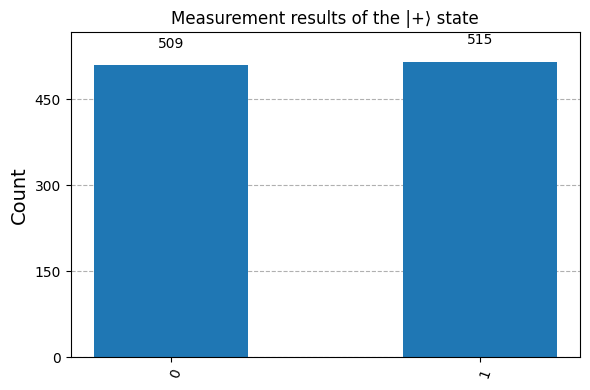

In [14]:
# Environment verification
import numpy as np
import sys
import qiskit
print("✅ Environment verification:")
print(f"   - Python version: {sys.version}")
print(f"   - Qiskit version: {qiskit.__version__}")

# Core imports
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
%matplotlib inline
import matplotlib.pyplot as plt
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector, Pauli
from IPython.display import display
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Confirm that AerSimulator works
sim = AerSimulator()
print("   - AerSimulator loaded successfully ✅")

# Build a basic circuit: prepare |+⟩ state
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

# Transpile and run
compiled = transpile(qc, sim)
result = sim.run(compiled).result()
counts = result.get_counts()
counts = dict(counts)

# Display results
print(f"   - Measurement results: {counts}")
fig = plt.figure(figsize=(6, 4))
plot_histogram(counts, ax=fig.gca())
plt.title("Measurement results of the |+⟩ state")
plt.tight_layout()
plt.show()

<div style="background: #E8E7EB; border-radius: 5px; font-family: sans-serif;">
  <p style="background: #2c3e50; color:white; padding: 10px 15px; font-size:18px; border-radius: 5px 5px 0 0; margin:0;">
    <b>5. Implementation</b>
  </p>
</div>

<div style="background-color: #f4f4f6; border-radius: 8px; padding: 15px 20px; font-family: 'Segoe UI', sans-serif; font-size: 16px; line-height: 1.6;">
    <h3 style="margin-top:0.2;">5.1 Pauli Gates (X, Y, Z)</h3>
    <p>
    The <strong>Pauli gates</strong> are the most fundamental single-qubit operations.  
    They correspond to rotations of <em>π radians</em> around the X, Y, and Z axes of the Bloch sphere.
    </p>
    <p>
</div>

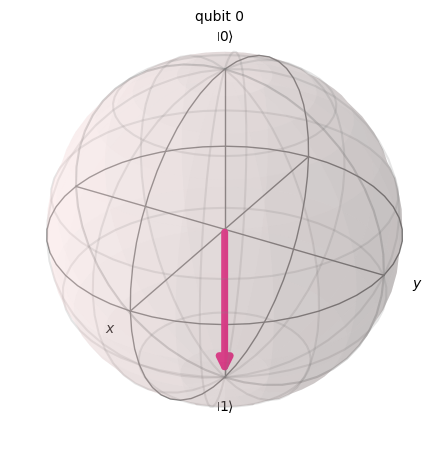

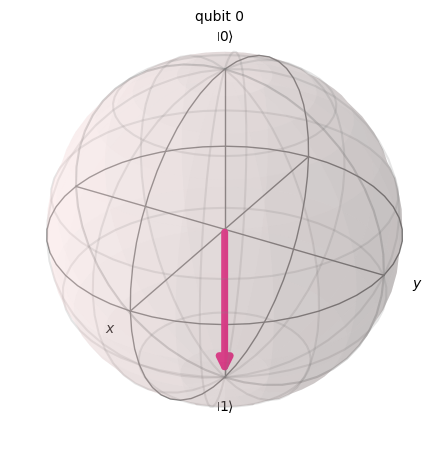

In [6]:
# Initialize the statevector simulator
sim = AerSimulator(method='statevector')

# Create a one-qubit circuit
qc_x = QuantumCircuit(1, 1)

# Apply the X gate (π rotation around the X-axis)
qc_x.x(0)

# Save the statevector before measurement
qc_x.save_statevector()
result_x = sim.run(qc_x).result()
state_x = result_x.data(0)['statevector']

# Plot the Bloch sphere representation
plot_bloch_multivector(state_x)

<div style="background-color:#f4f4f6;border-radius:8px;padding:10px 15px;font-family:'Segoe UI',sans-serif;">
  <p><strong>Interpretation:</strong>  
  The <strong>X gate</strong> flips the qubit between its computational basis states:  
  \(|0⟩ → |1⟩\) and \(|1⟩ → |0⟩\).  
  On the Bloch sphere, the vector moves from the <em>north pole</em> (|0⟩) to the <em>south pole</em> (|1⟩).</p>
</div>

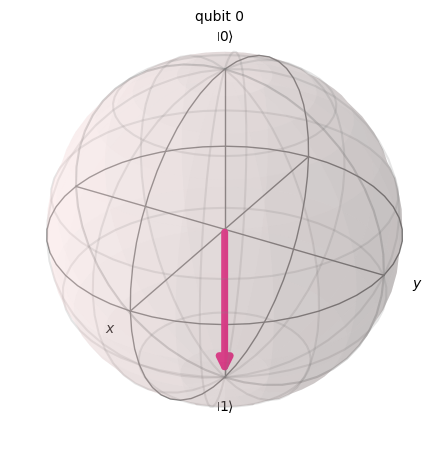

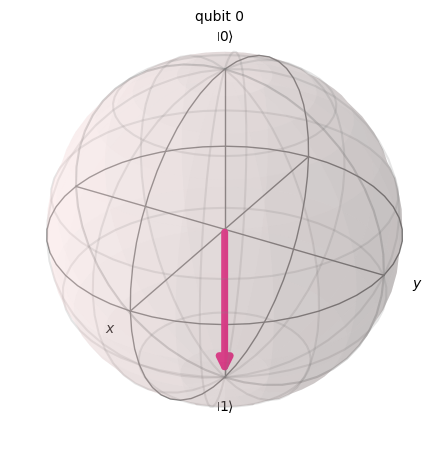

In [7]:
# Create a one-qubit circuit and apply Y gate
qc_y = QuantumCircuit(1, 1)
qc_y.y(0)

# Save the statevector
qc_y.save_statevector()
result_y = sim.run(qc_y).result()
state_y = result_y.data(0)['statevector']

# Visualize on the Bloch sphere
plot_bloch_multivector(state_y)

<div style="background-color:#f4f4f6;border-radius:8px;padding:10px 15px;font-family:'Segoe UI',sans-serif;">
  <p><strong>Interpretation:</strong>  
  The <strong>Y gate</strong> performs a π rotation around the Y-axis,  
  flipping the state while introducing a relative phase \(i\):  
  \(|0⟩ → i|1⟩,\; |1⟩ → −i|0⟩\).  
  On the Bloch sphere, the transition occurs through the Y plane instead of X.</p>
</div>


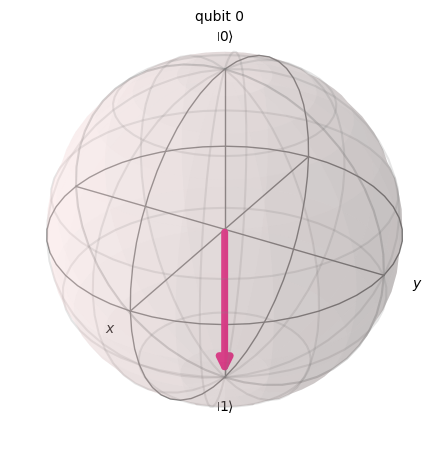

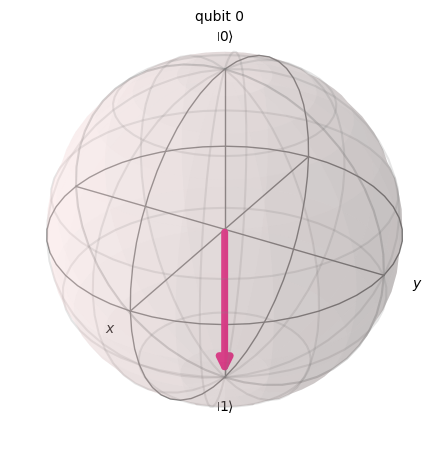

In [8]:
# Create circuit and prepare a superposition to observe the phase effect
qc_z = QuantumCircuit(1, 1)
qc_z.x(0)            # Create |1>
qc_z.z(0)            # Apply Z gate (π rotation around Z-axis)
qc_z.save_statevector()
result_z = sim.run(qc_z).result()
state_z = result_z.data(0)['statevector']

# Visualize the effect on the Bloch sphere
plot_bloch_multivector(state_z)


<div style="background-color:#f4f4f6;border-radius:8px;padding:10px 15px;font-family:'Segoe UI',sans-serif;">
  <p><strong>Interpretation:</strong>  
  The <strong>Z gate</strong> leaves \(|0⟩\) unchanged and multiplies \(|1⟩\) by −1,  
  corresponding to a π rotation around the Z-axis.  
  This operation does not change measurement probabilities but  
  alters the <em>phase</em> of the state, affecting interference in later computations.</p>
</div>

<div style="background-color: #f4f4f6; border-radius: 8px; padding: 15px 20px; font-family: 'Segoe UI', sans-serif; font-size: 16px; line-height: 1.6;">
  <h3 style="margin-top:0.2;">Measurement Results after Pauli Gates</h3>
  <p>
  When a single-qubit circuit includes any of the <strong>Pauli gates</strong> (X, Y, or Z) and is then measured in the standard <em>Z basis</em>,  
  the outcome will always be <strong>deterministic</strong> — the measurement gives either <strong>0 or 1 with 100% probability</strong>.
  </p>
  <p>
  This occurs because each Pauli gate maps the qubit onto one of the two computational basis states:
  </p>
  <ul>
    <li><strong>X gate:</strong> transforms \(|0⟩ → |1⟩\) and \(|1⟩ → |0⟩\).</li>
    <li><strong>Y gate:</strong> transforms \(|0⟩ → i|1⟩\) and \(|1⟩ → −i|0⟩\).</li>
    <li><strong>Z gate:</strong> leaves \(|0⟩\) unchanged and multiplies \(|1⟩\) by a phase of −1.</li>
  </ul>
  <p>
  Since all of these resulting states correspond to points lying <em>exactly on the poles of the Bloch sphere</em>  
  (i.e., the computational basis states \(|0⟩\) and \(|1⟩\)), measuring in the Z basis can only project onto one of those poles.  
  Therefore, the probability distribution collapses entirely to a single outcome — either 0 or 1 — depending on the transformation applied.
  </p>
</div>


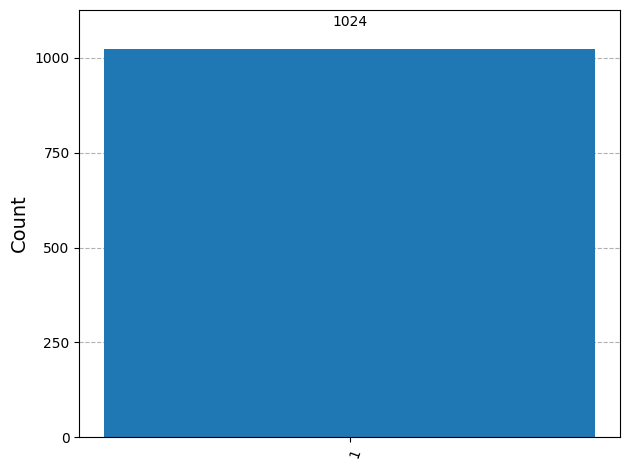

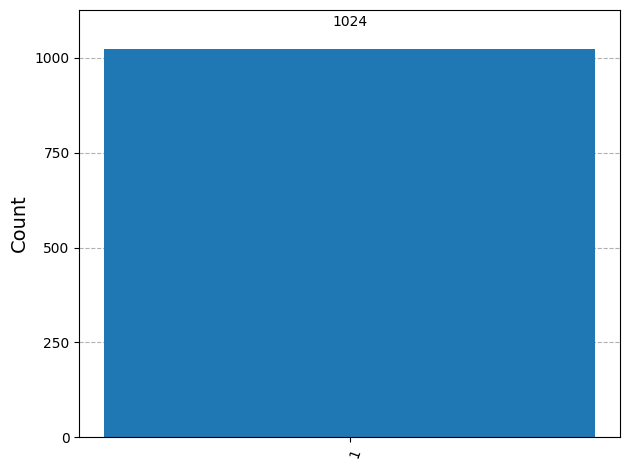

In [9]:
# Example of measurement (you can try any other of the circuits done before)
qc_y.measure(0, 0)
result_counts_y = sim.run(qc_y).result().get_counts()
plot_histogram(result_counts_y)

<div style="background-color: #f4f4f6; border-radius: 8px; padding: 15px 20px; font-family: 'Segoe UI', sans-serif; font-size: 16px; line-height: 1.6;">
  <h3 style="margin-top:0.2;">5.2 Hadamard Gate (H)</h3>
  <p>
  The <strong>Hadamard gate</strong> is one of the most important single-qubit operations.  
  It creates <em>quantum superposition</em> by transforming the computational basis states  
  into an equal combination of <code>|0⟩</code> and <code>|1⟩</code>.  
  On the Bloch sphere, this corresponds to a 180° rotation around the axis halfway between X and Z.
  </p>
</div>


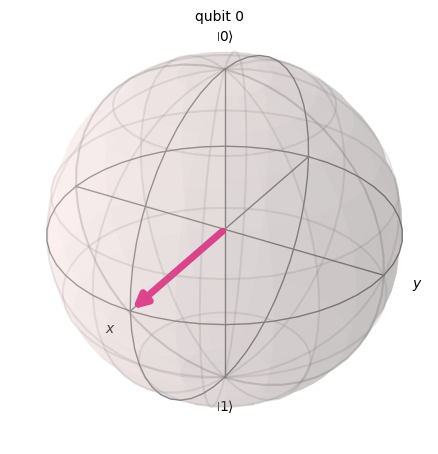

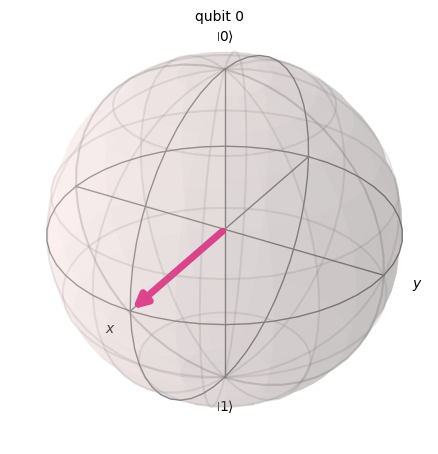

In [10]:
# Initialize simulator
sim = AerSimulator(method='statevector')

# Create a circuit and apply Hadamard
qc_h0 = QuantumCircuit(1, 1)
qc_h0.h(0)

# Save the statevector before measurement
qc_h0.save_statevector()
result_h0 = sim.run(qc_h0).result()
state_h0 = result_h0.data(0)['statevector']

# Visualize on the Bloch sphere
plot_bloch_multivector(state_h0)

<div style="background-color:#f4f4f6;border-radius:8px;padding:10px 15px;font-family:'Segoe UI',sans-serif;">
  <p><strong>Interpretation:</strong>  
  Applying <strong>H</strong> to <code>|0⟩</code> produces  
  <code>|+⟩ = (|0⟩ + |1⟩)/√2</code>, which lies on the equator of the Bloch sphere along the +X axis.  
  This state represents an <em>equal superposition</em> of <code>|0⟩</code> and <code>|1⟩</code>.</p>
</div>

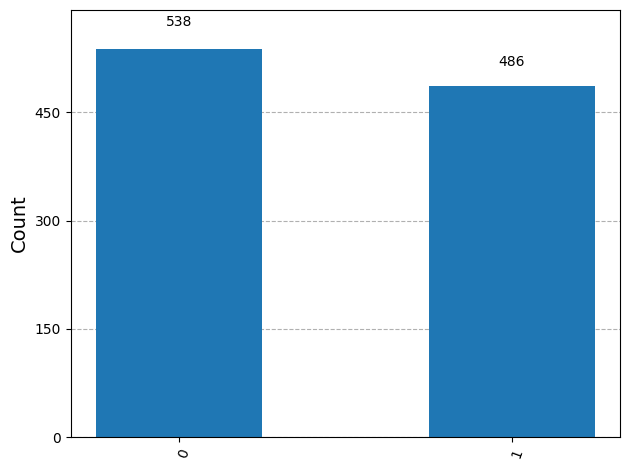

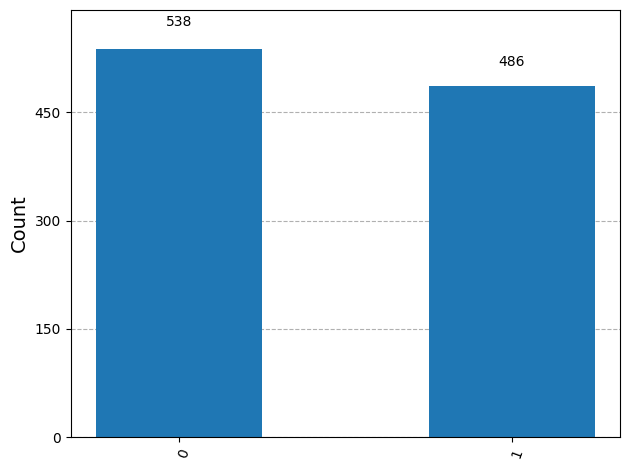

In [11]:
# Measure in the Z basis
qc_h0.measure(0, 0)
result_counts_h0 = sim.run(qc_h0).result().get_counts()
plot_histogram(result_counts_h0)

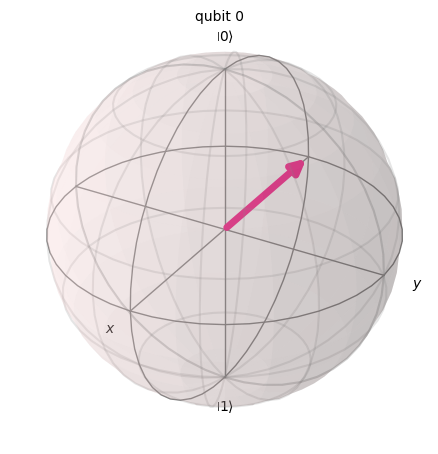

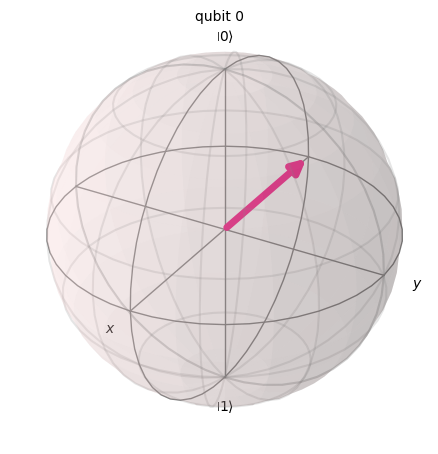

In [12]:
qc_h1 = QuantumCircuit(1, 1)
qc_h1.x(0)  # prepare |1>
qc_h1.h(0)
qc_h1.save_statevector()
result_h1 = sim.run(qc_h1).result()
state_h1 = result_h1.data(0)['statevector']

# Bloch sphere visualization
plot_bloch_multivector(state_h1)

<div style="background-color:#f4f4f6;border-radius:8px;padding:10px 15px;font-family:'Segoe UI',sans-serif;">
  <p><strong>Interpretation:</strong>  
  When applied to <code>|1⟩</code>, the Hadamard gate creates  
  <code>|−⟩ = (|0⟩ − |1⟩)/√2</code>, which lies on the opposite side of the Bloch sphere,  
  along the −X axis.  
  Both <code>|+⟩</code> and <code>|−⟩</code> are eigenstates of the X operator.</p>
</div>

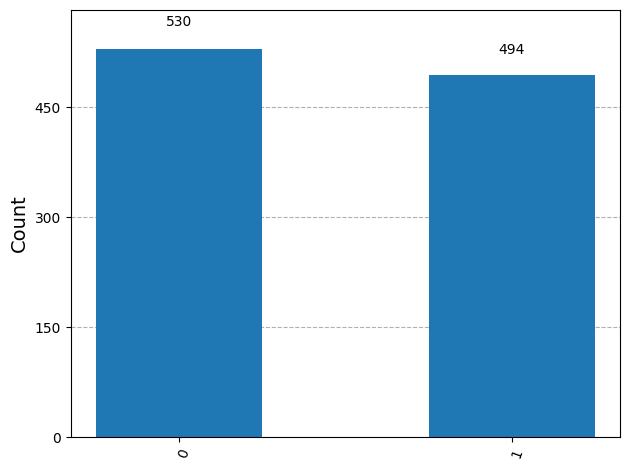

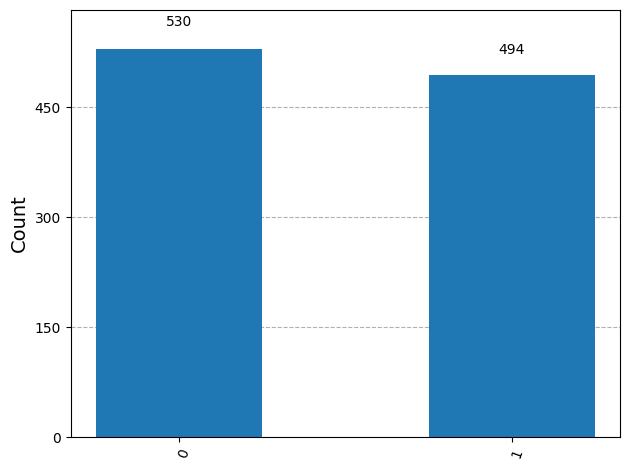

In [13]:
# Measure in the Z basis
qc_h1.measure(0, 0)
result_counts_h1 = sim.run(qc_h1).result().get_counts()
plot_histogram(result_counts_h1)

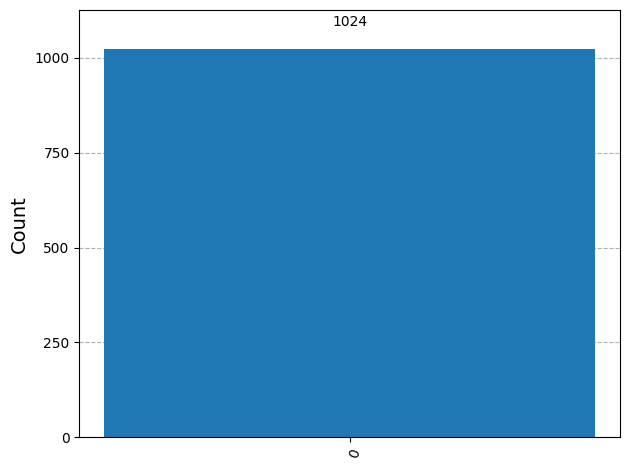

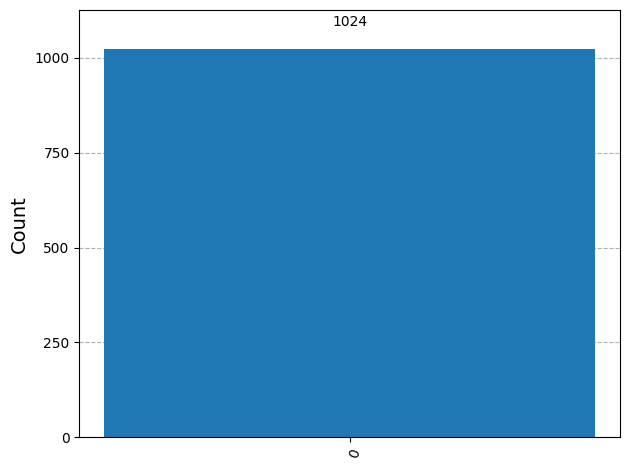

In [14]:
# Measurement of |+> in the X basis (equivalent to applying another H)
qc_xbasis = QuantumCircuit(1, 1)
qc_xbasis.h(0)       # prepare |+>
qc_xbasis.h(0)       # rotate measurement basis to Z
qc_xbasis.measure(0, 0)

result_counts_xbasis = sim.run(qc_xbasis).result().get_counts()
plot_histogram(result_counts_xbasis)

<div style="background-color:#f4f4f6;border-radius:8px;padding:10px 15px;font-family:'Segoe UI',sans-serif;">
  <p><strong>Interpretation:</strong>  
  When measuring the state <code>|+⟩</code> in the <strong>X basis</strong>,  
  the result is always <strong>“0”</strong>, because it is an eigenstate of the X operator.  
  However, when measured in the <strong>Z basis</strong>, the probabilities of obtaining 0 or 1 are both 50%,  
  reflecting the equal superposition of computational states.</p>
</div>


<div style="background-color:#f4f4f6;border-radius:8px;padding:10px 15px;font-family:'Segoe UI',sans-serif;">
  <h2 style="margin-top:0.2;">Measurement Results for the Hadamard Gate</h2>
  <p>
  The <strong>Hadamard gate</strong> produces states that behave differently depending on the measurement basis:
  </p>
  <ul>
    <li>In the <strong>Z basis</strong>, the outcomes are <em>probabilistic</em>: both 0 and 1 occur with 50% probability.</li>
    <li>In the <strong>X basis</strong>, the outcomes are <em>deterministic</em>:  
        <code>|+⟩</code> always gives 0 and <code>|−⟩</code> always gives 1.</li>
  </ul>
  <p>
  This distinction highlights the core idea of <em>quantum superposition</em>:  
  a qubit can be in a definite state with respect to one basis while being indeterminate in another.  
  The Hadamard gate is therefore essential for switching between bases and enabling quantum interference.
  </p>
</div>


<div style="background-color: #f4f4f6; border-radius: 8px; padding: 15px 20px; font-family: 'Segoe UI', sans-serif; font-size: 16px; line-height: 1.6;">
  <h3 style="margin-top:0.2;">5.3 Phase and Rotation Gates (S, T, R<sub>x</sub>, R<sub>y</sub>, R<sub>z</sub>)</h3>
  <p>
  The <strong>Phase</strong> and <strong>Rotation</strong> gates are essential for fine-tuning quantum states.  
  They allow precise control of a qubit’s <em>phase</em> and <em>orientation</em> on the Bloch sphere.  
  While the <strong>S</strong> and <strong>T</strong> gates change the phase of the <code>|1⟩</code> component,  
  the <strong>R<sub>x</sub></strong>, <strong>R<sub>y</sub></strong>, and <strong>R<sub>z</sub></strong> gates perform rotations by an arbitrary angle <code>θ</code> around each corresponding axis.
  </p>
</div>


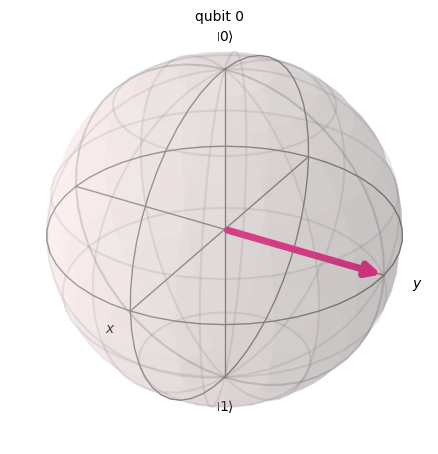

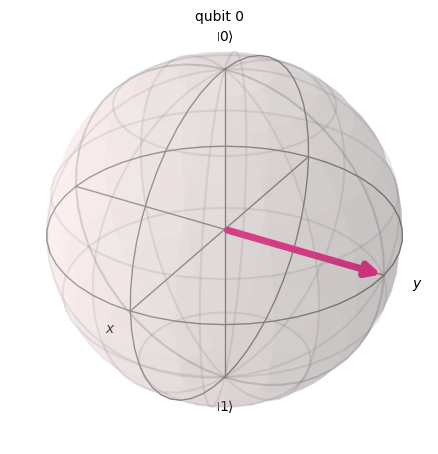

In [15]:
# Initialize the simulator
sim = AerSimulator(method='statevector')

# Apply S gate to a superposition to observe its phase effect
qc_s = QuantumCircuit(1)
qc_s.h(0)     # Create |+>
qc_s.s(0)     # Apply S gate (90° rotation around Z-axis)
qc_s.save_statevector()

# Run and visualize
result_s = sim.run(qc_s).result()
state_s = result_s.data(0)['statevector']
plot_bloch_multivector(state_s)

<div style="background-color:#f4f4f6;border-radius:8px;padding:10px 15px;font-family:'Segoe UI',sans-serif;">
  <p><strong>Interpretation:</strong>  
  The <strong>S gate</strong> applies a 90° phase rotation around the Z-axis.  
  Although this phase shift is not directly observable through measurement, it rotates the Bloch vector  
  within the equatorial (X–Y) plane, affecting interference in later quantum operations.</p>
</div>

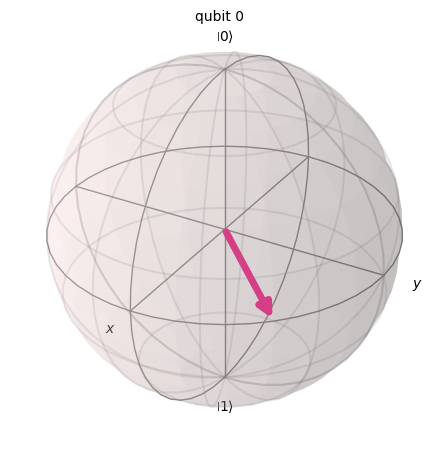

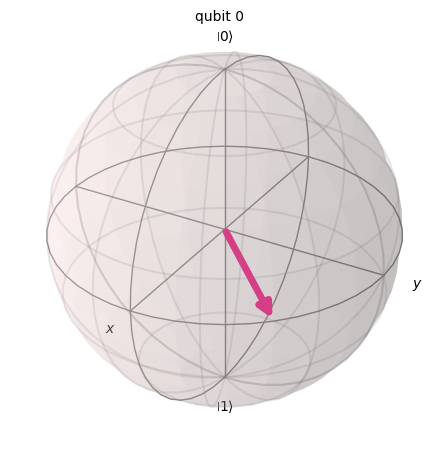

In [16]:
qc_t = QuantumCircuit(1)
qc_t.h(0)     # Prepare |+>
qc_t.t(0)     # Apply T gate (45° rotation around Z-axis)
qc_t.save_statevector()

result_t = sim.run(qc_t).result()
state_t = result_t.data(0)['statevector']
plot_bloch_multivector(state_t)

<div style="background-color:#f4f4f6;border-radius:8px;padding:10px 15px;font-family:'Segoe UI',sans-serif;">
  <p><strong>Interpretation:</strong>  
  The <strong>T gate</strong> performs a 45° rotation around the Z-axis,  
  introducing a smaller phase shift than the S gate.  
  This subtle adjustment is essential in algorithms requiring high phase precision,  
  such as <em>Quantum Fourier Transform</em> and <em>error correction protocols</em>.</p>
</div>

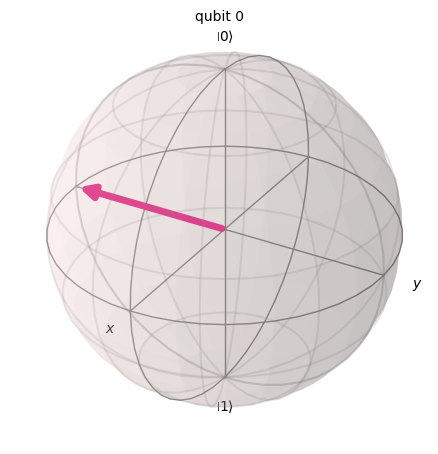

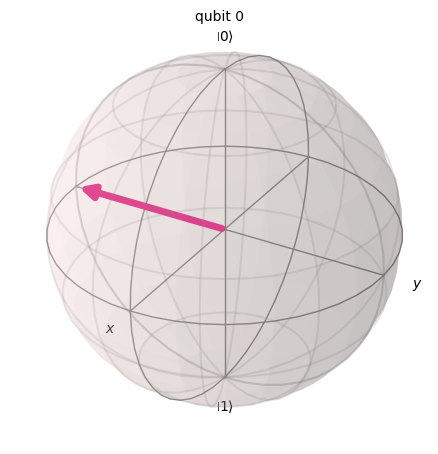

In [17]:
qc_rx = QuantumCircuit(1)
qc_rx.rx(np.pi/2, 0)  # Rotate by π/2 radians (90°) around X-axis
qc_rx.save_statevector()

result_rx = sim.run(qc_rx).result()
state_rx = result_rx.data(0)['statevector']
plot_bloch_multivector(state_rx)


<div style="background-color:#f4f4f6;border-radius:8px;padding:10px 15px;font-family:'Segoe UI',sans-serif;">
  <p><strong>Interpretation:</strong>  
  The <strong>R<sub>x</sub>(θ)</strong> gate rotates the qubit around the X-axis by an angle <code>θ</code>.  
  For <code>θ = π</code>, it becomes equivalent to the <strong>X gate</strong>.  
  The Bloch vector moves along a vertical plane passing through the X-axis.</p>
</div>

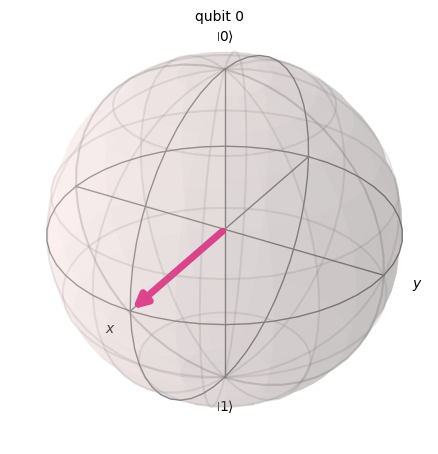

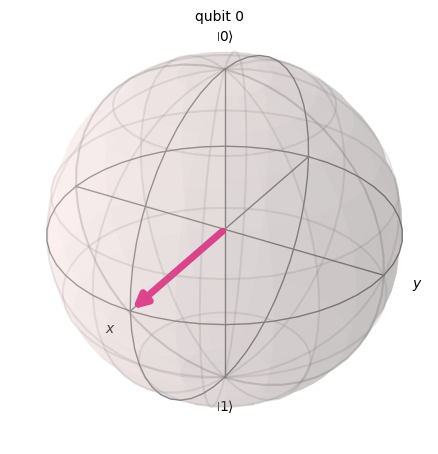

In [18]:
qc_ry = QuantumCircuit(1)
qc_ry.ry(np.pi/2, 0)  # Rotate by π/2 radians (90°) around Y-axis
qc_ry.save_statevector()

result_ry = sim.run(qc_ry).result()
state_ry = result_ry.data(0)['statevector']
plot_bloch_multivector(state_ry)

<div style="background-color:#f4f4f6;border-radius:8px;padding:10px 15px;font-family:'Segoe UI',sans-serif;">
  <p><strong>Interpretation:</strong>  
  The <strong>R<sub>y</sub>(θ)</strong> gate performs a rotation around the Y-axis.  
  A 180° rotation (<code>θ = π</code>) is equivalent to the <strong>Y gate</strong>.  
  This rotation changes both the real amplitudes of the state while keeping their relative phase constant.</p>
</div>

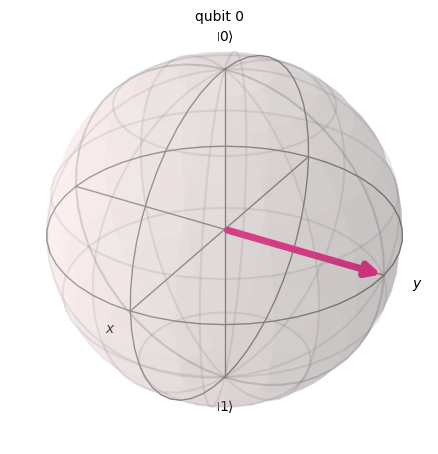

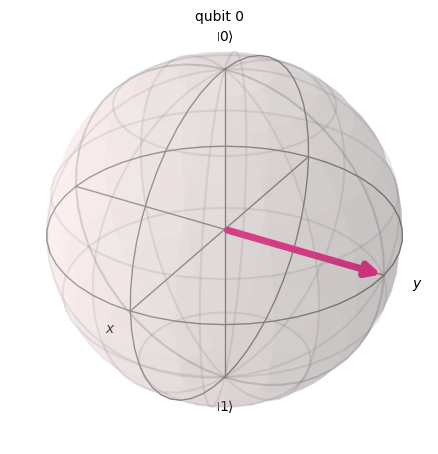

In [19]:
qc_rz = QuantumCircuit(1)
qc_rz.h(0)            # Prepare |+> to visualize phase evolution
qc_rz.rz(np.pi/2, 0)  # Rotate by π/2 radians (90°) around Z-axis
qc_rz.save_statevector()

result_rz = sim.run(qc_rz).result()
state_rz = result_rz.data(0)['statevector']
plot_bloch_multivector(state_rz)

<div style="background-color:#f4f4f6;border-radius:8px;padding:10px 15px;font-family:'Segoe UI',sans-serif;">
  <p><strong>Interpretation:</strong>  
  The <strong>R<sub>z</sub>(θ)</strong> gate rotates the qubit’s phase by <code>θ</code> around the Z-axis.  
  For <code>θ = π/2</code>, it is equivalent to the <strong>S gate</strong>,  
  and for <code>θ = π/4</code>, to the <strong>T gate</strong>.  
  While this change cannot be detected by direct measurement,  
  it alters the interference pattern when combined with other operations.</p>
</div>

<div style="background-color:#f4f4f6;border-radius:8px;padding:10px 15px;font-family:'Segoe UI',sans-serif;">
  <h3 style="margin-top:0.2;">Summary of Phase and Rotation Gates</h3>
  <p>
  The following table summarizes the behavior of the phase and rotation gates:
  </p>
  <table style="font-size:15px;width:100%;border-collapse:collapse;">
    <tr style="background-color:#e8e7eb;">
      <th>Gate</th><th>Rotation Axis</th><th>Angle (θ)</th><th>Effect</th><th>Equivalent Operation</th>
    </tr>
    <tr>
      <td><strong>S</strong></td><td>Z</td><td>π/2</td><td>Adds 90° phase to |1⟩</td><td>R<sub>z</sub>(π/2)</td>
    </tr>
    <tr>
      <td><strong>T</strong></td><td>Z</td><td>π/4</td><td>Adds 45° phase to |1⟩</td><td>R<sub>z</sub>(π/4)</td>
    </tr>
    <tr>
      <td><strong>R<sub>x</sub>(θ)</strong></td><td>X</td><td>Variable</td><td>Rotation around X-axis</td><td>X if θ = π</td>
    </tr>
    <tr>
      <td><strong>R<sub>y</sub>(θ)</strong></td><td>Y</td><td>Variable</td><td>Rotation around Y-axis</td><td>Y if θ = π</td>
    </tr>
    <tr>
      <td><strong>R<sub>z</sub>(θ)</strong></td><td>Z</td><td>Variable</td><td>Phase rotation</td><td>S or T for specific θ</td>
    </tr>
  </table>
  <p>
  These gates do not necessarily change measurement outcomes in the Z basis,  
  but they are fundamental for generating <em>quantum interference</em> and controlling phase relationships between states.  
  Together, they form the continuous set of operations required for full qubit manipulation on the Bloch sphere.
  </p>
</div>

<div style="background-color: #f4f4f6; border-radius: 8px; padding: 15px 20px; font-family: 'Segoe UI', sans-serif; font-size: 16px; line-height: 1.6;">
  <h3 style="margin-top:0.2;"> Measurement Results on Phase and Rotation Gates</h3>
  <p>
  While phase and rotation gates may not always affect the <em>probabilities</em> of measuring 0 or 1 in the computational basis,  
  their effects become evident when measuring in different <strong>bases</strong>.  
  In this section, we will analyze (as an example):
  </p>
  <ul>
    <li>The <strong>S gate</strong>, which introduces a phase shift around the Z-axis.</li>
    <li>The <strong>R<sub>y</sub>(θ)</strong> gate, which rotates the state around the Y-axis.</li>
  </ul>
  <p>
  By changing the measurement basis, we can reveal how these gates influence the quantum state and its interference properties.
  </p>
</div>


Z basis:


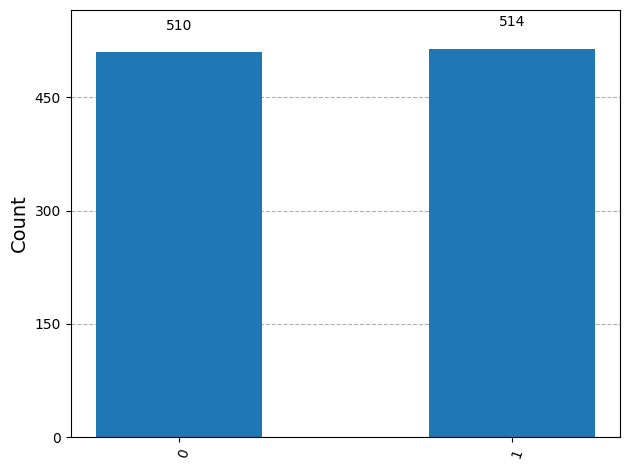

X basis:


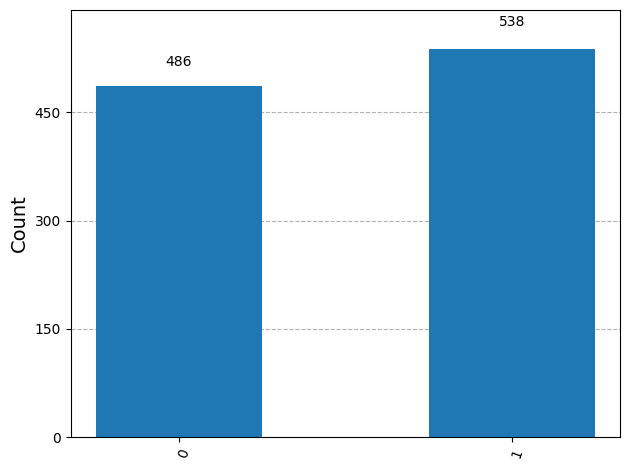

Y basis:


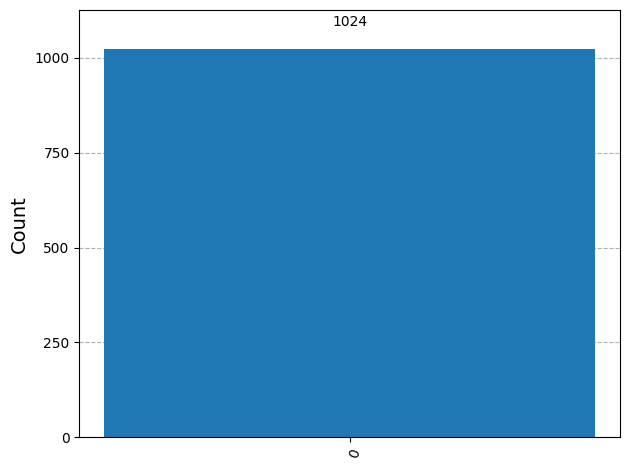

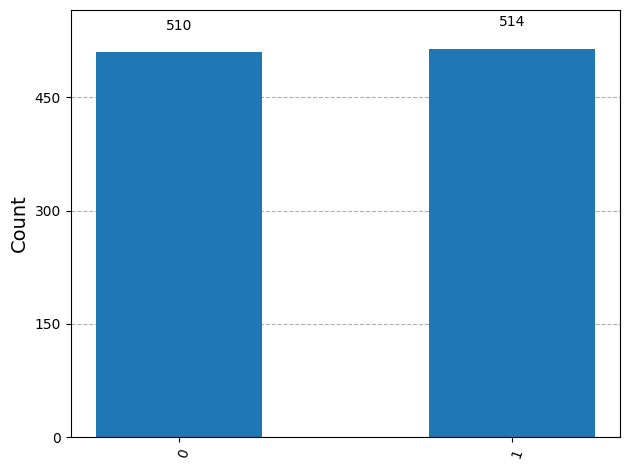

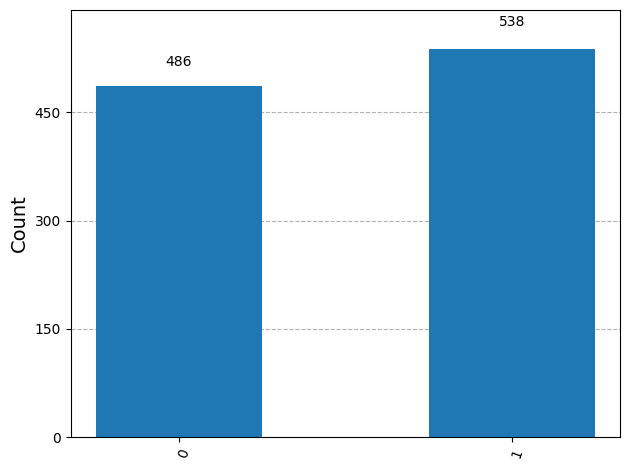

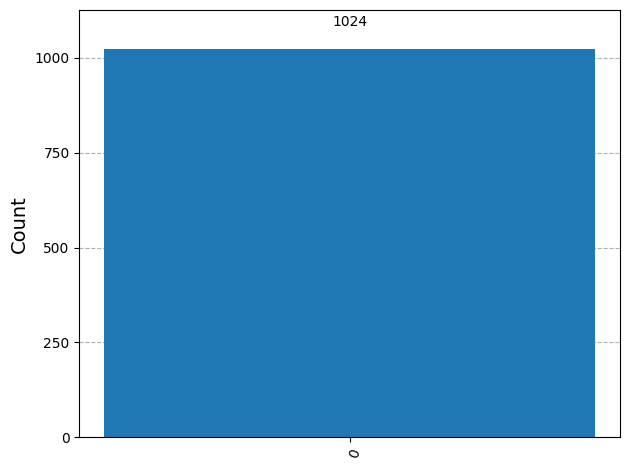

In [20]:
sim = AerSimulator()

# Base Z measurement
qc_sz = QuantumCircuit(1, 1)
qc_sz.h(0)      # Prepare |+> superposition
qc_sz.s(0)      # Apply S gate (phase shift)
qc_sz.measure(0, 0)

# Base X measurement (apply H before measuring)
qc_sx = QuantumCircuit(1, 1)
qc_sx.h(0)
qc_sx.s(0)
qc_sx.h(0)
qc_sx.measure(0, 0)

# Base Y measurement (apply S† + H before measuring)
qc_sy = QuantumCircuit(1, 1)
qc_sy.h(0)
qc_sy.s(0)
qc_sy.sdg(0)
qc_sy.h(0)
qc_sy.measure(0, 0)

# Execute all circuits
results_s = sim.run([qc_sz, qc_sx, qc_sy], shots=1024).result()
counts_sz = results_s.get_counts(qc_sz)
counts_sx = results_s.get_counts(qc_sx)
counts_sy = results_s.get_counts(qc_sy)

# Plot histograms
print("Z basis:")
display(plot_histogram(counts_sz))
print("X basis:")
display(plot_histogram(counts_sx))
print("Y basis:")
display(plot_histogram(counts_sy))


<div style="background-color:#f4f4f6;border-radius:8px;padding:10px 15px;font-family:'Segoe UI',sans-serif;">
  <p><strong>Interpretation:</strong>  
  The <strong>S gate</strong> only affects the phase of the qubit’s state, so in the <strong>Z basis</strong> the measurement probabilities remain 50–50.  
  However, in the <strong>X</strong> and <strong>Y</strong> bases, this phase shift alters the interference pattern,  
  changing how the state projects onto those axes.  
  This demonstrates that phase information is invisible in one basis but observable in another.</p>
</div>

Z basis:


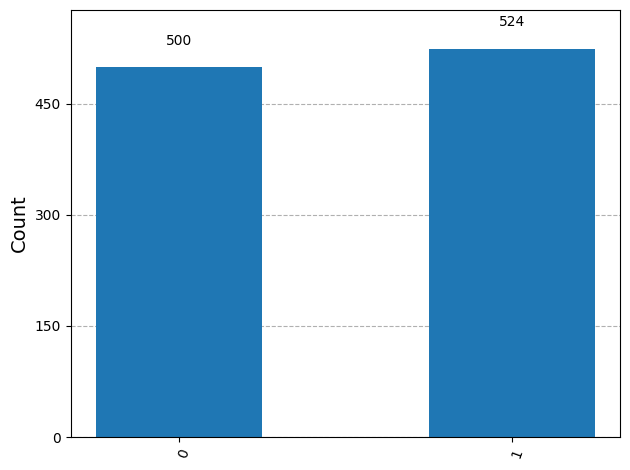

X basis:


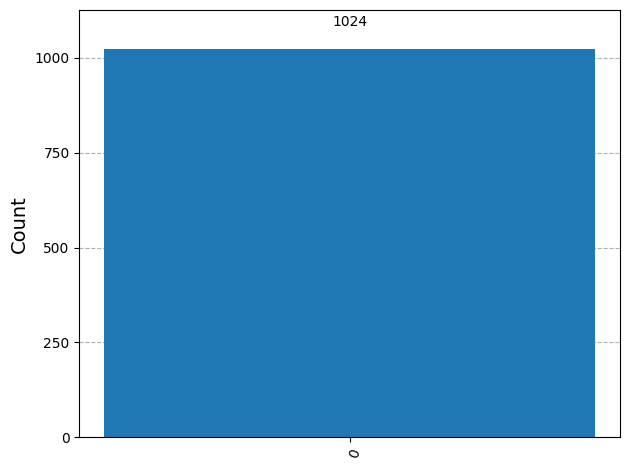

Y basis:


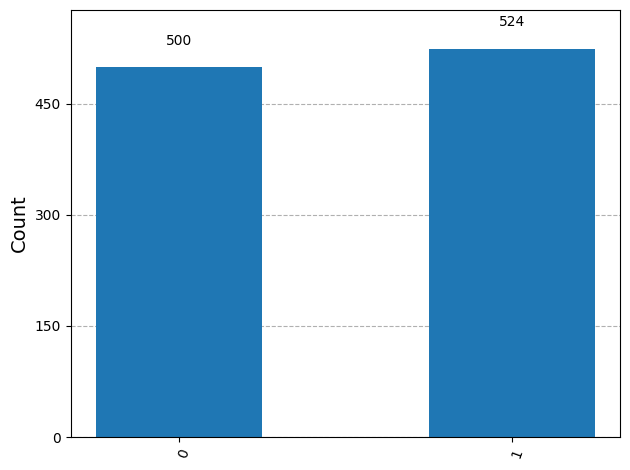

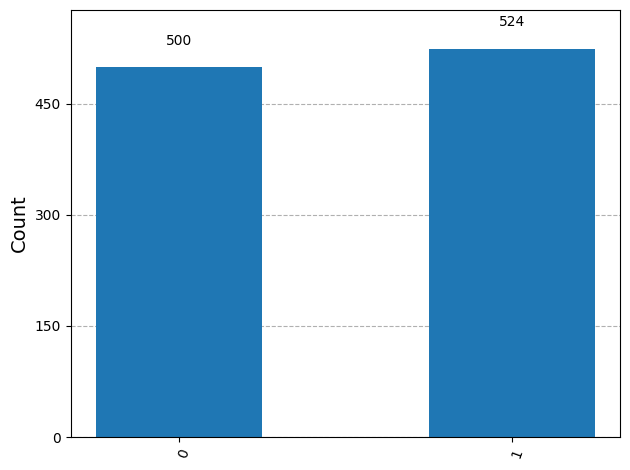

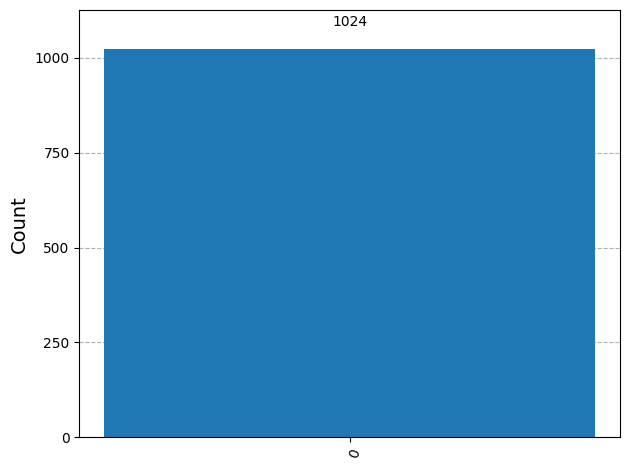

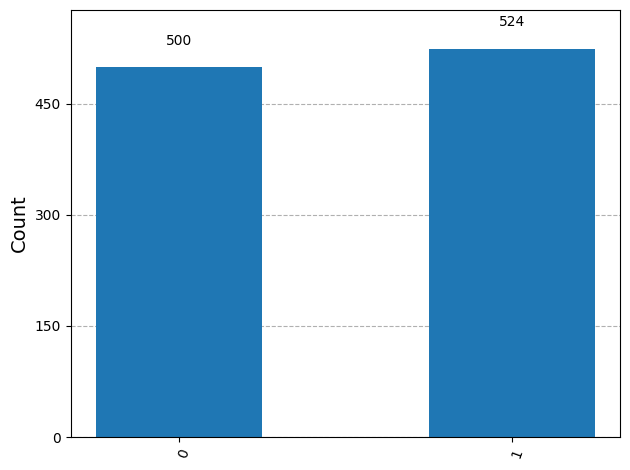

In [21]:
# Define θ = π/2 for demonstration
theta = np.pi / 2

# Z basis measurement
qc_ry_z = QuantumCircuit(1, 1)
qc_ry_z.ry(theta, 0)
qc_ry_z.measure(0, 0)

# X basis measurement
qc_ry_x = QuantumCircuit(1, 1)
qc_ry_x.ry(theta, 0)
qc_ry_x.h(0)
qc_ry_x.measure(0, 0)

# Y basis measurement
qc_ry_y = QuantumCircuit(1, 1)
qc_ry_y.ry(theta, 0)
qc_ry_y.sdg(0)
qc_ry_y.h(0)
qc_ry_y.measure(0, 0)

# Run all
results_ry = sim.run([qc_ry_z, qc_ry_x, qc_ry_y], shots=1024).result()
counts_ry_z = results_ry.get_counts(qc_ry_z)
counts_ry_x = results_ry.get_counts(qc_ry_x)
counts_ry_y = results_ry.get_counts(qc_ry_y)

# Display results
print("Z basis:")
display(plot_histogram(counts_ry_z))
print("X basis:")
display(plot_histogram(counts_ry_x))
print("Y basis:")
display(plot_histogram(counts_ry_y))

<div style="background-color:#f4f4f6;border-radius:8px;padding:10px 15px;font-family:'Segoe UI',sans-serif;">
  <p><strong>Interpretation:</strong>  
  The <strong>R<sub>y</sub>(θ)</strong> gate rotates the qubit state by an angle <code>θ</code> around the Y-axis.  
  This changes the state’s position on the Bloch sphere,  
  altering the probabilities of obtaining <code>0</code> or <code>1</code> depending on the measurement basis.  
  In the <strong>Z basis</strong>, the outcome probabilities reflect the projection of the rotated vector onto the poles.  
  In the <strong>X</strong> and <strong>Y</strong> bases, the interference pattern changes accordingly,  
  providing direct evidence of the continuous nature of quantum rotations.</p>
</div>

<div style="background: #f4f4f6; border-left: 4px solid #2c3e50; padding: 15px; font-family: sans-serif;">
  <h3 style="margin-top:0;">Exercises</h3>
  <ul style="font-size:16px;">
    <li>1) <strong>Apply different Pauli gates</strong> (<em>X, Y, Z</em>) to an initial state <code>|0⟩</code> and <code>|1⟩</code>.  
    <em>Visualize</em> each resulting state on the Bloch sphere and explain how the rotation axis determines its final position.</li>
    <li>2) <strong>Combine</strong> a Hadamard gate with a Pauli gate (for instance, <em>H → Z</em> or <em>H → X</em>).  
    Observe the new state in the <em>Z</em> and <em>X</em> bases, and describe how interference and phase play a role in the outcome.</li>
    <li>3) <strong>Experiment</strong> with the rotation gates <em>R<sub>x</sub>(θ)</em>, <em>R<sub>y</sub>(θ)</em>, and <em>R<sub>z</sub>(θ)</em> for different angles.  
    Record how the Bloch vector evolves as θ increases from 0 to π, and identify at which values the state returns to <code>|0⟩</code> or <code>|1⟩</code>.</li>
    <li>4) <strong>Investigate the effect of measurement bases</strong>.  
    Prepare a qubit in the state <code>|+⟩</code>, then measure it in <em>Z</em>, <em>X</em>, and <em>Y</em> bases.  
    Compare the histograms and explain why only one basis produces deterministic results.</li>
    <li>5) <strong>Run a simple circuit on real quantum hardware</strong>.  
    Build a circuit that prepares the state <code>|+⟩</code> using a Hadamard gate, measure it in the Z basis,  
    and <em>compare</em> the results between a simulator and a real backend (e.g., <code>ibm_oslo</code> or <code>ibm_perth</code>).  
    Discuss how hardware noise affects the probabilities.</li>
  </ul>
</div>


<div style="background: #f4f4f6; border-left: 4px solid #2c3e50; padding: 15px; font-family: sans-serif;">
    <h3 style="margin-top:0;">Exercise 1: <strong>Apply different Pauli gates</strong> to an initial state <code>|0⟩</code> and <code>|1⟩</code>. Visualize each resulting state on the Bloch sphere and explain how the rotation axis determines its final position.</h3>
</div>  

#### Code Answer:

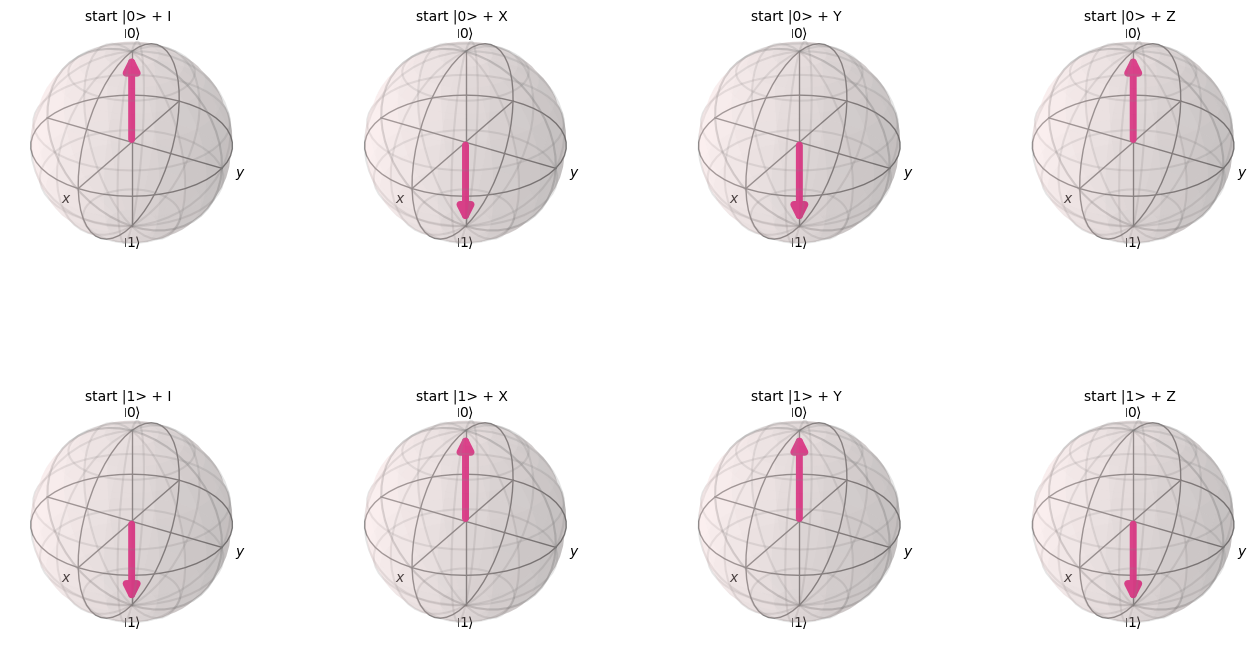

In [22]:
# --- Exercise 1: Apply different Pauli gates to |0> and |1> and visualize on the Bloch sphere ---


from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Pauli
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt

# Helper function to get the Bloch vector from a statevector
def bloch_from_statevector(statevector):
    """Return (x, y, z) Bloch coordinates from a Qiskit Statevector."""
    sx = statevector.expectation_value(Pauli("X")).real
    sy = statevector.expectation_value(Pauli("Y")).real
    sz = statevector.expectation_value(Pauli("Z")).real
    return [sx, sy, sz]

# Define initial states and Pauli gates to test
initial_states = {
    "|0>": None,  # start in |0>
    "|1>": "x"    # we can get |1> by applying X to |0>
}

pauli_gates = {
    "I": None,    # identity (for reference)
    "X": "x",
    "Y": "y",
    "Z": "z"
}

results = []  # to store (label, bloch_vector)

for init_label, init_op in initial_states.items():
    for gate_label, gate_op in pauli_gates.items():
        # Create a 1-qubit circuit
        qc = QuantumCircuit(1)
        
        # Prepare initial state (|0> by default, or apply X to get |1>)
        if init_op == "x":
            qc.x(0)
        
        # Apply the Pauli gate under test
        if gate_op == "x":
            qc.x(0)
        elif gate_op == "y":
            qc.y(0)
        elif gate_op == "z":
            qc.z(0)
        # if None -> identity, do nothing
        
        # Get final statevector
        sv = Statevector.from_instruction(qc)
        bloch_vec = bloch_from_statevector(sv)
        
        label = f"start {init_label} + {gate_label}"
        results.append((label, bloch_vec))

# --- Plot all results ---
# We'll create one figure with several Bloch spheres side by side
num_results = len(results)
cols = 4
rows = (num_results + cols - 1) // cols

fig = plt.figure(figsize=(4 * cols, 4 * rows))

for idx, (label, bloch_vec) in enumerate(results, start=1):
    ax = fig.add_subplot(rows, cols, idx, projection='3d')
    plot_bloch_vector(bloch_vec, title=label, ax=ax)

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()

#### Theoretical Answer:

When **Pauli gates** are applied to a qubit initially in the states $|0\rangle$ or $|1\rangle$, they perform rotations of **180° (π radians)** around the main Bloch sphere axes:

- **X gate:** rotation around the **x-axis**  
- **Y gate:** rotation around the **y-axis**  
- **Z gate:** rotation around the **z-axis**

Because $|0\rangle$ and $|1\rangle$ sit at the **north** and **south poles** of the Bloch sphere, these rotations produce simple transformations.

For the initial state $|0\rangle$:

$$
\begin{align}
X|0\rangle &= |1\rangle \quad &\text{(flips from north to south pole)} \\
Y|0\rangle &= i|1\rangle \quad &\text{(moves to south pole; global phase $i$)} \\
Z|0\rangle &= |0\rangle \quad &\text{(unchanged, eigenstate of $Z$)}
\end{align}
$$

For the initial state $|1\rangle$:

$$
\begin{align}
X|1\rangle &= |0\rangle \quad &\text{(flips from south to north pole)} \\
Y|1\rangle &= -i|0\rangle \quad &\text{(same physical result; global phase $-i$)} \\
Z|1\rangle &= -|1\rangle \quad &\text{(stays at south pole; adds $\pi$ phase shift)}
\end{align}
$$

Each Pauli gate therefore corresponds to a **half-turn rotation** around its respective axis, altering the qubit’s **position** or **phase** depending on its initial alignment. These transformations illustrate how unitary operations can be visualized as rotations on the Bloch sphere.

<div style="background: #f4f4f6; border-left: 4px solid #2c3e50; padding: 15px; font-family: sans-serif;">
    <h3 style="margin-top:0;">Exercise 2: <strong>Combine</strong> a Hadamard gate with a Pauli gate. Observe the new state in the <em>Z</em> and <em>X</em> bases, and describe how interference and phase play a role in the outcome.</h3>
</div>  

#### Code Answer: 

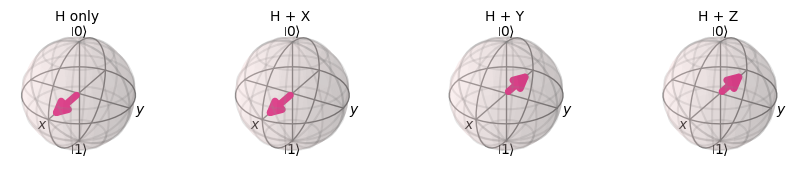

In [23]:
# --- Exercise 2: Combine a Hadamard gate with a Pauli gate and observe the new state in Z and X bases ---


from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Pauli
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt

# Helper to get Bloch coordinates
def bloch_from_statevector(statevector):
    sx = statevector.expectation_value(Pauli("X")).real
    sy = statevector.expectation_value(Pauli("Y")).real
    sz = statevector.expectation_value(Pauli("Z")).real
    return [sx, sy, sz]

# Define combinations: Hadamard + each Pauli gate
combinations = {
    "H only": [],
    "H + X": ["x"],
    "H + Y": ["y"],
    "H + Z": ["z"]
}

results = []

for label, gates in combinations.items():
    qc = QuantumCircuit(1)
    qc.h(0)  # Hadamard first
    for g in gates:
        getattr(qc, g)(0)
    sv = Statevector.from_instruction(qc)
    results.append((label, bloch_from_statevector(sv)))

# Plot resulting states
fig = plt.figure(figsize=(10, 3))
for i, (label, bloch_vec) in enumerate(results, start=1):
    ax = fig.add_subplot(1, 4, i, projection='3d')
    plot_bloch_vector(bloch_vec, title=label, ax=ax)

plt.subplots_adjust(wspace=0.6)
plt.show()

#### Theoretical Answer: 

When a **Hadamard gate** is followed by a **Pauli gate**, the qubit’s state changes depending on how each rotation affects the relative **phase** between the basis states.  

The Hadamard gate transforms **|0⟩** into an **equal superposition**:

$$
|\psi\rangle = H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
$$

This state lies on the **+x-axis** of the Bloch sphere (the **|+⟩** state).  
Applying a Pauli gate after that modifies either the **direction** or the **phase** of this superposition:

- **H + X:**
  $$
  XH|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = |+⟩
  $$
  The state is unchanged because \(X\) swaps |0⟩ and |1⟩, which has no effect on this symmetric superposition.

- **H + Z:**
  $$
  ZH|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = |−⟩
  $$
  The **relative phase** between components flips, rotating the vector from +x to −x on the Bloch sphere.

- **H + Y:**
  $$
  YH|0\rangle = \frac{i}{\sqrt{2}}(|1\rangle - |0\rangle) = i|−⟩
  $$
  The global phase \(i\) is unobservable, so the physical state is again **|−⟩**.  
  This gate changes the **phase** and thus the **interference pattern** when measured in the X basis.

When measured in the **Z basis**, the results appear random (≈50% |0⟩, 50% |1⟩), but in the **X basis**, interference determines the outcome deterministically:
- **|+⟩ → always measured as +1**
- **|−⟩ → always measured as −1**

This illustrates how **phase differences** introduced by gates like **Z** or **Y** lead to **constructive or destructive interference** depending on the measurement basis.


<div style="background: #f4f4f6; border-left: 4px solid #2c3e50; padding: 15px; font-family: sans-serif;">
    <h3 style="margin-top:0;">Exercise 3: <strong>Experiment</strong> with the rotation gates <em>R<sub>x</sub>(θ)</em>, <em>R<sub>y</sub>(θ)</em>, and <em>R<sub>z</sub>(θ)</em> for different angles.</h3>
</div>  

#### Code Answer:

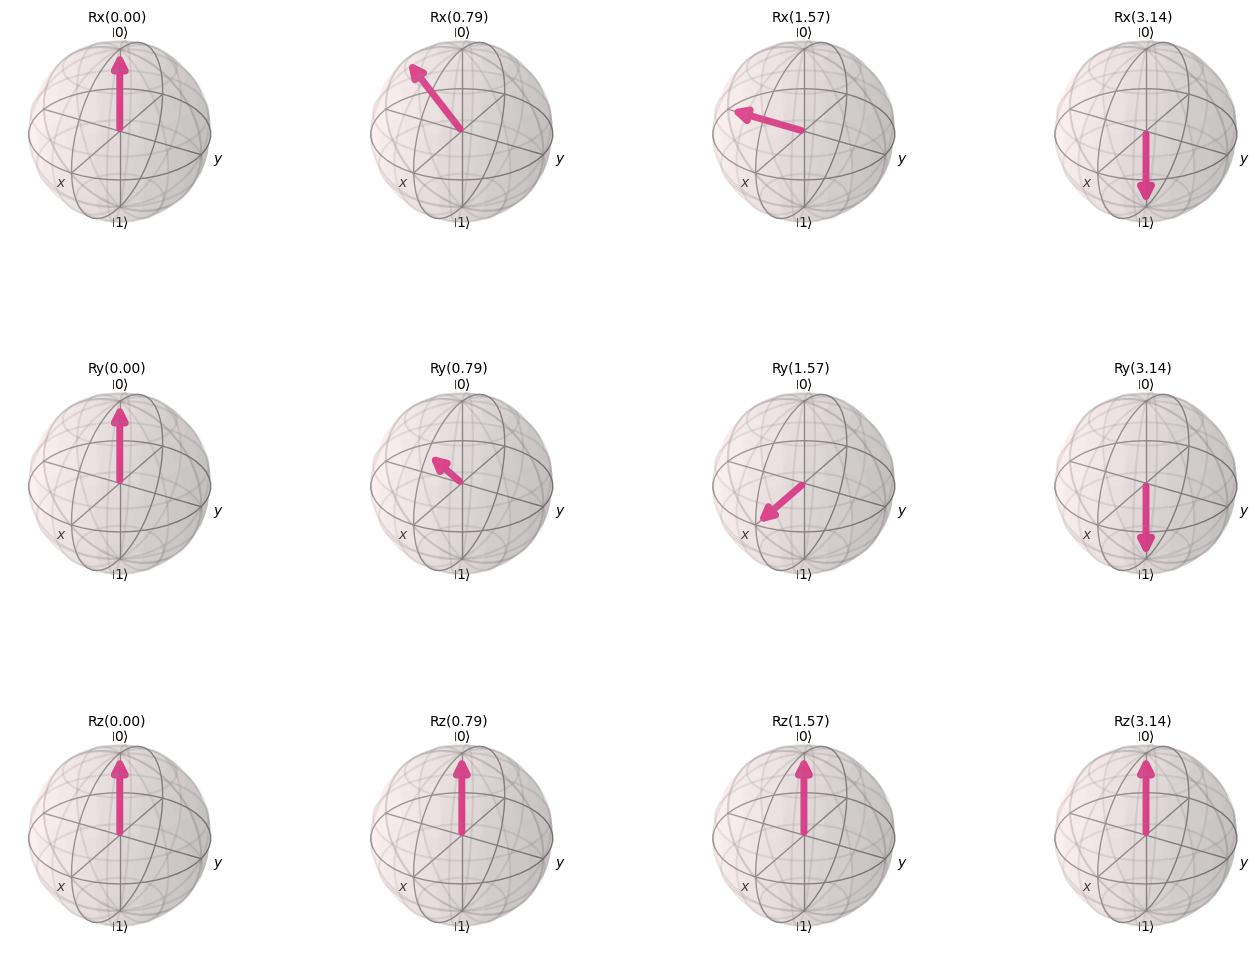

In [28]:
# --- Exercise 3: Experiment with rotation gates Rx(θ), Ry(θ), and Rz(θ) for different angles ---


def bloch_from_statevector(statevector):
    """Return (x, y, z) Bloch coordinates from a Qiskit Statevector."""
    sx = statevector.expectation_value(Pauli("X")).real
    sy = statevector.expectation_value(Pauli("Y")).real
    sz = statevector.expectation_value(Pauli("Z")).real
    return [sx, sy, sz]

# angles to test
angles = [0, np.pi/4, np.pi/2, np.pi]

rotations = [
    ("Rx", "rx"),
    ("Ry", "ry"),
    ("Rz", "rz")
]

fig = plt.figure(figsize=(4 * len(angles), 4 * len(rotations)))

plot_idx = 1
for rot_label, rot_method in rotations:
    for theta in angles:
        qc = QuantumCircuit(1)
        # start from |0>
        getattr(qc, rot_method)(theta, 0)
        sv = Statevector.from_instruction(qc)
        bloch_vec = bloch_from_statevector(sv)

        ax = fig.add_subplot(len(rotations), len(angles), plot_idx, projection='3d')
        plot_bloch_vector(
            bloch_vec,
            title=f"{rot_label}({theta:.2f})",
            ax=ax
        )
        plot_idx += 1

plt.subplots_adjust(wspace=0.6, hspace=0.6)
plt.show()


#### Theoretical Answer:

When **rotation gates** are applied to a single qubit, they rotate the state vector on the Bloch sphere by an angle $ \theta $ around a specific axis:

- **$R_x(\theta)$:** rotation by $ \theta $ around the **x-axis**  
- **$R_y(\theta)$:** rotation by $ \theta $ around the **y-axis**  
- **$R_z(\theta)$:** rotation by $ \theta $ around the **z-axis**

Starting from the state **|0⟩** (north pole), rotations around **x** and **y** move the point along the sphere, while rotations around **z** leave **|0⟩** in place because it lies on the rotation axis.

For example, for **$R_y(\theta)$** acting on **|0⟩**:

$$
R_y(\theta)|0\rangle = \cos\left(\frac{\theta}{2}\right)|0\rangle + \sin\left(\frac{\theta}{2}\right)|1\rangle
$$

This creates a **superposition** whose amplitudes depend smoothly on $ \theta $.  
At $ \theta = \pi $, we get **|1⟩**; at $ \theta = \pi/2 $, we get an **equal superposition**.

Similarly, for **$R_x(\theta)$**:

$$
R_x(\theta)|0\rangle = \cos\left(\frac{\theta}{2}\right)|0\rangle - i\,\sin\left(\frac{\theta}{2}\right)|1\rangle
$$

Here the probabilities are the same as with **$R_y(\theta)$**, but there is an extra relative **phase** factor **−i**, so the point ends up on a different meridian of the Bloch sphere.

For **$R_z(\theta)$** applied to **|0⟩**:

$$
R_z(\theta)|0\rangle = |0\rangle
$$

It only changes the **phase** of the **|1⟩** component (which is zero here), so visually nothing moves.  
This illustrates that **rotations around an axis only affect states not aligned with that axis**.


<div style="background: #f4f4f6; border-left: 4px solid #2c3e50; padding: 15px; font-family: sans-serif;">
    <h3 style="margin-top:0;">Exercise 4: <strong>Prepare</strong> a qubit in the state <code>|+⟩</code>, then measure it in <em>Z</em>, <em>X</em>, and <em>Y</em> bases. Compare the histograms and explain why only one basis produces deterministic results.</h3>
</div>  

#### Code Answer:

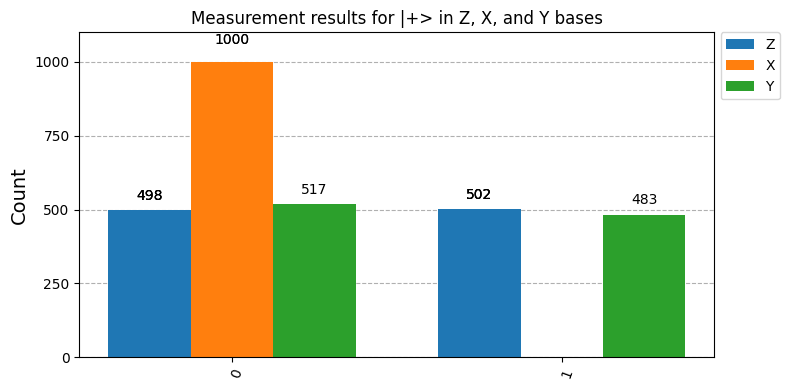


Circuit for Z-basis measurement:


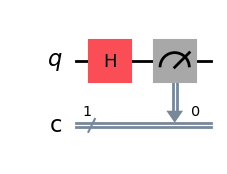


Circuit for X-basis measurement:


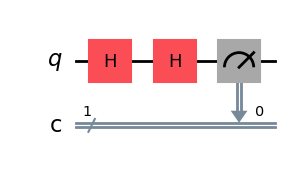


Circuit for Y-basis measurement:


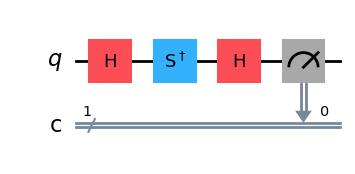

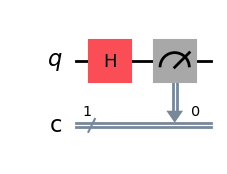

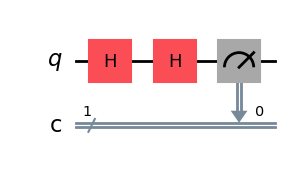

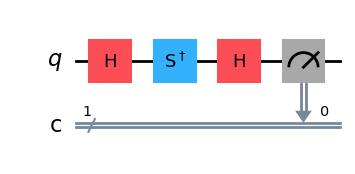

In [32]:
# Initialize simulator
simulator = AerSimulator()

# Function to create a circuit, measure in a chosen basis, and return counts
def measure_in_basis(basis):
    qc = QuantumCircuit(1, 1)
    qc.h(0)  # Prepare |+> = (|0> + |1>)/√2
    
    # Adjust measurement depending on basis
    if basis == 'X':
        qc.h(0)  # Rotate measurement to X-basis
    elif basis == 'Y':
        qc.sdg(0)  # Rotate around -Z by π/2
        qc.h(0)    # Then rotate to X-basis
    
    qc.measure(0, 0)
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled, shots=1000).result()
    return result.get_counts(), qc

# Run measurements in Z, X, and Y bases
bases = ['Z', 'X', 'Y']
results = {}
circuits = {}

for basis in bases:
    counts, qc = measure_in_basis(basis)
    results[basis] = counts
    circuits[basis] = qc

# --- KEY FIX HERE ---
# plot_histogram quiere una LISTA de dicts, en el mismo orden que la leyenda
results_list = [results[b] for b in bases]

# Display histograms
plot_histogram(results_list, legend=bases, figsize=(8, 4),
               title="Measurement results for |+> in Z, X, and Y bases")
plt.show()

# (Optional) Draw the circuits
for basis in bases:
    print(f"\nCircuit for {basis}-basis measurement:")
    display(circuits[basis].draw('mpl'))


#### Theoretical Answer:

The **|+⟩** state is defined as:

$$
|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
$$

This is an **eigenstate of the X operator**, meaning that if we measure it in the **X basis**, the outcome is deterministic — it will always yield the result **+1** (or classical bit **0**, depending on convention).

However, when we measure the same state in the **Z** or **Y** bases, the results are **probabilistic** because **|+⟩** is not an eigenstate of either \( Z \) or \( Y \). In those bases, the measurement collapses the state randomly into one of the basis vectors with equal probability.

Mathematically:

- In the **Z basis**:
  $$
  P(0) = P(1) = \frac{1}{2}
  $$
  The superposition has equal amplitudes for |0⟩ and |1⟩, so we get roughly half 0s and half 1s.

- In the **X basis**:
  $$
  P(+)=1, \quad P(-)=0
  $$
  The state **|+⟩** is an eigenvector of \( X \), so measurement is deterministic.

- In the **Y basis**:
  $$
  P(+i) = P(-i) = \frac{1}{2}
  $$
  Since **|+⟩** lies on the x-axis of the Bloch sphere, measurement along the y-axis yields random results.

Thus, only the **X basis** measurement produces a deterministic histogram (a single bar), while **Z** and **Y** bases show roughly equal counts for both outcomes — a clear demonstration of how measurement depends on the chosen basis and the qubit’s orientation on the Bloch sphere.


<div style="background: #f4f4f6; border-left: 4px solid #2c3e50; padding: 15px; font-family: sans-serif;">
    <h3 style="margin-top:0;">Exercise 5: <strong>Run a simple circuit on real quantum hardware</strong>.  
    Build a circuit that prepares the state <code>|+⟩</code> using a Hadamard gate, measure it in the Z basis,  
    and <em>compare</em> the results between a simulator and a real backend.  
    Discuss how hardware noise affects the probabilities.</h3>
</div>  

#### Code Answer:

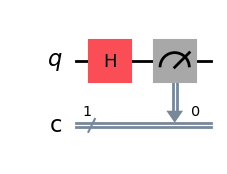

In [15]:
# Step 1: Create the circuit that prepares |+> = (|0> + |1>)/√2
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

fig = qc.draw('mpl')
plt.show()      

In [16]:
# Step 2: Run on simulator
simulator = AerSimulator()
compiled_sim = transpile(qc, simulator)
sim_result = simulator.run(compiled_sim, shots=1024).result()
sim_counts = sim_result.get_counts()
sim_counts

{'1': 518, '0': 506}

In [17]:
# Step 3: Connect to IBM and choose backend
service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False)
print(f"Running on real backend: {backend.name}")
backend

qiskit_runtime_service._resolve_cloud_instances:WARNING:2025-11-22 18:06:10,057: Default instance not set. Searching all available instances.


Running on real backend: ibm_torino


<IBMBackend('ibm_torino')>

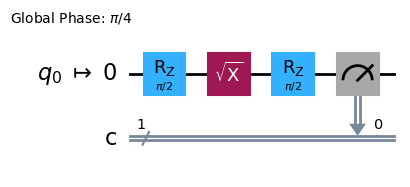

In [18]:
# Step 4: Transpile to ISA circuit
# Generate preset ISA-compatible pass manager
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)

# Produce the hardware-native (ISA) circuit
isa_qc = pm.run(qc)

fig = isa_qc.draw('mpl')
plt.show()      # muestra solo una figura

In [19]:
# Step 5: Execute on real hardware using SamplerV2
sampler = Sampler(mode=backend)

shots = 1024

# Run the ISA circuit as a Sampler V2 job
job = sampler.run([(isa_qc, None, shots)])
print("Job ID:", job.job_id())

result = job.result()
pub_result = result[0]

# Extract counts from the joined measurement data
real_counts = pub_result.join_data().get_counts()
real_counts

Job ID: d4guremlo8as739q58kg


{'0': 558, '1': 466}

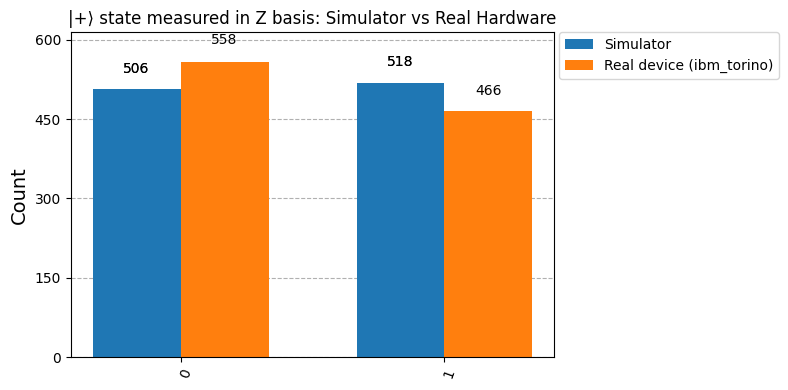

In [20]:
# Step 6: Compare simulator vs real hardware
plot_histogram(
    [sim_counts, real_counts],
    legend=["Simulator", f"Real device ({backend.name})"],
    figsize=(8, 4),
    title="|+⟩ state measured in Z basis: Simulator vs Real Hardware"
)
plt.show()

#### Theoretical Answer:

The circuit prepares the state $|+\rangle$, which ideally results in a **50–50 distribution** between measurement outcomes 0 and 1 when measured in the Z basis. The simulator reproduces this perfectly because it models an ideal, noise-free quantum system.

On a **real quantum device**, the results are usually very close to this ideal distribution, although small deviations are expected. These arise naturally from the physical behavior of the hardware, such as slight imperfections in gate operations or measurement noise.

In a simple one-qubit circuit like this, the differences tend to be minor, but they still highlight the contrast between an ideal simulator and an actual quantum processor.

<div style="background: #fffdf7; border-left: 4px solid #2c3e50; padding: 15px; font-family: sans-serif;">
  <h3 style="margin-top:0;">Reflection</h3>
  <ul style="font-size:16px;">
    <li>What is the conceptual difference between a <strong>quantum superposition</strong> and a <strong>classical probability distribution</strong>?  
        How does this distinction appear in the Bloch sphere representation?</li>
    <li>How do <strong>phase shifts</strong> (like those introduced by S, T, or R<sub>z</sub> gates) affect a qubit’s behavior  
        if they do not change the measurement probabilities in the Z basis?</li>
    <li>Why does the <strong>measurement basis</strong> determine whether the result is deterministic or probabilistic?  
        Can you explain this using the orientation of the Bloch vector?</li>
    <li>How could <strong>hardware noise</strong> or imperfect calibration influence the outcomes of your measurements  
        when executing these circuits on a real quantum device?</li>
    <li>After exploring the Pauli, Hadamard, Phase, and Rotation gates,  
        what connections can you identify between these single-qubit operations and more complex multi-qubit algorithms?</li>
  </ul>
</div>


<div style="background: #e7f1e8; border-left: 4px solid #2c3e50; padding: 15px; font-family: sans-serif;">
  <h3 style="margin-top:0;">Conclusion</h3>
  <p style="font-size:16px;">
    In this lab you moved from the <strong>theory of single-qubit gates</strong> to their <em>hands-on implementation</em> with Qiskit 2.x.  
    You explored how <strong>Pauli (X, Y, Z)</strong>, <strong>Hadamard (H)</strong>, and <strong>Phase/Rotation</strong> gates transform quantum states on the <em>Bloch sphere</em>, 
    how <strong>phases</strong> affect <em>interference</em>, and how <strong>measurement bases</strong> (Z, X, Y) reveal different aspects of a state.
  </p>
  <p style="font-size:16px;">
    Practically, you learned to use the <code>AerSimulator</code>, <code>save_statevector()</code>, and visualization tools to <strong>simulate, inspect, and reason</strong> about circuits, 
    and you compared outcomes across bases to connect mathematical models with observable results.
  </p>
  <p style="font-size:16px;">
    These skills—<strong>state preparation</strong>, <strong>basis changes</strong>, and <strong>phase control</strong>—are foundational for multi-qubit protocols and algorithms you’ll meet next.  
    With this toolkit in place, you’re ready to tackle more advanced circuits, explore entanglement, and run experiments on <em>real quantum hardware</em>.
  </p>
</div>


<div style="background: #f4f4f6; border-radius: 5px; font-family: sans-serif;">
  <p style="background: #2c3e50; color:white; padding: 10px 15px; font-size:18px; border-radius: 5px 5px 0 0; margin:0;">
    <b>References</b>
  </p>
  <ul style="padding: 10px 20px; font-size:16px; margin:0;">
    <li><a href="https://qiskit.org/documentation/">Qiskit Documentation</a> — official API docs and guides for Qiskit 2.x.</li>
    <li><a href="https://arxiv.org/abs/2302.02953">“Digital Simulation of Single Qubit Markovian Open Quantum Systems: A Tutorial”</a> — open-access arXiv tutorial on simulating noise and decoherence in single-qubit systems</li>
    <li><a href="https://arxiv.org/abs/0904.2656">“Diagrams of States in Quantum Information: an Illustrative Tutorial”</a> — open-access resource on using diagrammatic methods to understand quantum circuits and gates</li>
  </ul>
</div>
